<a href="https://colab.research.google.com/github/jmontero23/SenalesySistemas/blob/main/Parcial_1_SyS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Punto 1**


In [283]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import convolve
from scipy.spatial.distance import cdist

In [284]:
def my_ceropen(x,ymin, ymax): #en general se pueden definir valores por defecto
  '''
  Codigo base para simular proceso de cero y pendiente
  Se ingresa arreglo de numpy y los valores min  y max despues de cero y pendiente
  '''
  xmax = max(x) # x.max()
  xmin = min(x) # x.min()
  m = (ymax - ymin)/(xmax - xmin)
  c = ymin - m*xmin
  yv = m*x + c
  return yv

In [285]:
#función cuantización punto a punto

def my_cuantizador(yn, vq) : #yn punto a #cuantizar, vq vector de estados

  Ne = vq.shape[0] #tamaño vector de estados
  dn = cdist(yn.reshape(-1,1),vq.reshape(-1,1))#distancia yn a vector estados, reshape(-1,1) asegura vectores columna para poder utilizar cdist
  ind = np.argmin(dn) #posición distancia min
  return vq[ind]

(189, 32)

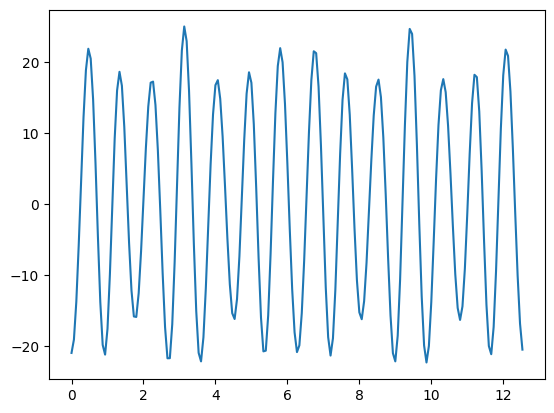

In [286]:
#Ejemplo de señal despues de cero y pendiente y discretización
#Recuerde que el proceso de discretización debe ser implementado
from scipy.spatial.distance import cdist

#señal original
To = 2*np.pi
Fo = 1/To
Fs = 15 #asegurar nyquist
Ts = 1/Fs
tv = np.arange(0,2*To,Ts) #procesar dos periodos discretizados

y = -20*np.cos(7*tv)-3*np.cos(5*tv)+2*np.cos(10*tv)
plt.plot(tv,y)

#cero y pendiente
ycs = my_ceropen(y, ymin=-3.3,ymax=5)

#número de bits y vector de cuantización
nbits = 5
rmin = -3.3
rmax = 5
ve = np.linspace(rmin,rmax,2**nbits) # (rmax-rmin)/(2^#bits - 1) -> si se quiere incluir rmin y rmax

#distancias y cero pendiente a vector cuantizacion
d = cdist(ycs.reshape(-1,1),ve.reshape(-1,1)) #se utiliza reshape(-1,1) para generar vectores columna como lo pide cdist
d.shape # d es una matriz de 500 x 8, ej: la fila 1 incluye la distancia euclidea entre y[0] y los 8 elementos en ve

In [287]:
#se requiere identificar el elemento ve[j] más cercano a y[i] para genera señal cuantizada
ind = np.argmin(d,axis=1) #el parámetro axis = 1 indica que busca la posición a lo largo de las columnas del elemento más pequeño en cada fila
ind

array([ 1,  2,  6, 11, 17, 23, 27, 29, 28, 24, 18, 12,  6,  2,  1,  3,  8,
       15, 21, 25, 27, 26, 22, 16, 11,  7,  4,  4,  6, 10, 15, 20, 24, 26,
       26, 24, 20, 14,  8,  3,  0,  0,  4,  9, 16, 24, 29, 31, 30, 25, 18,
       11,  5,  1,  0,  2,  7, 13, 18, 23, 26, 26, 24, 21, 16, 11,  7,  5,
        4,  6, 10, 15, 21, 25, 27, 26, 22, 16, 10,  4,  1,  1,  4, 10, 17,
       23, 27, 29, 28, 24, 18, 12,  7,  3,  1,  2,  5,  9, 15, 21, 26, 29,
       29, 25, 20, 13,  7,  2,  1,  2,  7, 13, 19, 24, 27, 26, 23, 18, 12,
        8,  5,  4,  6,  9, 14, 19, 23, 25, 26, 24, 21, 16, 10,  4,  1,  0,
        2,  8, 15, 22, 28, 31, 30, 26, 20, 13,  6,  2,  0,  2,  6, 11, 17,
       22, 25, 26, 25, 22, 17, 13,  8,  5,  4,  5,  9, 14, 19, 24, 27, 26,
       23, 18, 11,  5,  2,  1,  3,  8, 15, 22, 26, 29, 28, 25, 20, 14,  8,
        4,  1])

In [288]:
print(ycs[1],ind[1],ve[ind[1]]) # para y[50] = 0.58, el estado más cercano en ve es el elemento 1 que corresponde a ve[1]=0.71

-2.7351540637640035 2 -2.7645161290322577


In [289]:
#recorrer vector cero y spam discretizado para cuantizar

for i in range(ycs.shape[0]):
   if i==0: #primera muestra
     yq = my_cuantizador(ycs[i],ve)
   else:
     yq = np.append(yq,my_cuantizador(ycs[i],ve)) #apilar datos cuantizando si i>0

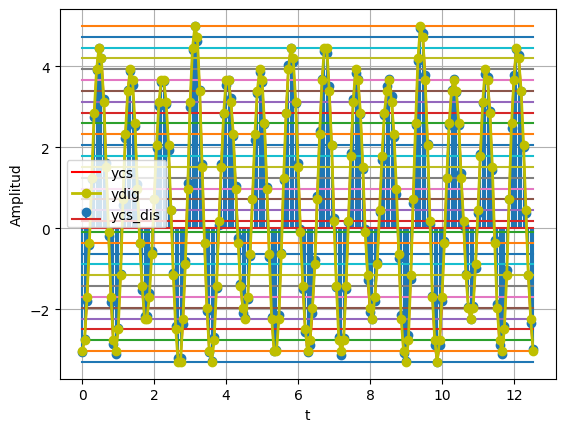

In [290]:
#graficar señales

plt.plot(tv,ycs,c='r', label='ycs')#cs continua

plt.stem(tv,ycs, label='ycs_dis')#cs discreta

#estados de cuantización

for v in ve:
  plt.plot(tv,v*np.ones(len(tv)))

# graficar señal Digital (discreta + cuantizada)

plt.plot(tv,yq,c='y',marker='o',label='ydig', linewidth=2)

plt.legend()
plt.grid()
plt.xlabel('t')
plt.ylabel('Amplitud')
plt.show()

**Punto 2**

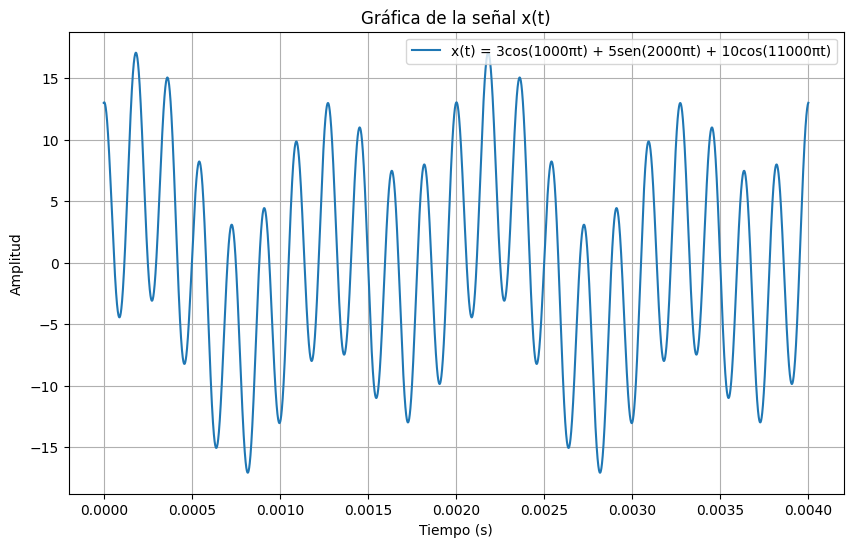

In [291]:
#Se grafica la señal original
t = np.linspace(0, 0.004, 10000) # Se define t y damos valor al intervalo de tiempo a graficar

# Se define x_t como la señal a trabajar
x_t = 3*np.cos(1000*np.pi*t) + 5*np.sin(2000*np.pi*t) + 10*np.cos(11000*np.pi*t)

# Se grafica la señal x(t)
plt.figure(figsize=(10, 6)) # Tamaño de la figura
plt.plot(t, x_t, label='x(t) = 3cos(1000πt) + 5sen(2000πt) + 10cos(11000πt)') #Agregar leyendas y nombres al gráfico
plt.title('Gráfica de la señal x(t)')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.legend()
plt.grid(True)
plt.show()

In [292]:
#Se crea una función para muestrear y graficar nuestra señal
def muestrear_y_graficar(fs, duracion=0.004, titulo=''):
    """
    Muestra y grafica la señal x_t, utilizando la frecuencia de muestreo de 5kHz.

    Especificación de los parámetros:
    - fs: Frecuencia de muestreo en Hz.
    - duracion: Duración de la señal en segundos para la simulación.
    - titulo: Título para la gráfica de la señal.
    """

    Ts = 1/fs   # Periodo de muestreo
    t = np.arange(0, duracion, Ts)  # Vector de tiempo

    # Señal
    x_t = 3*np.cos(1000*np.pi*t) + 5*np.sin(2000*np.pi*t) + 10*np.cos(11000*np.pi*t)

    # Gráfica de la señal muestreada
    plt.figure(figsize=(10, 6))
    plt.stem(t, x_t, linefmt='b-', markerfmt="bo", basefmt="k")
    plt.title(titulo)
    plt.xlabel('Tiempo (s)')
    plt.ylabel('Amplitud')
    plt.grid(True)
    plt.show()

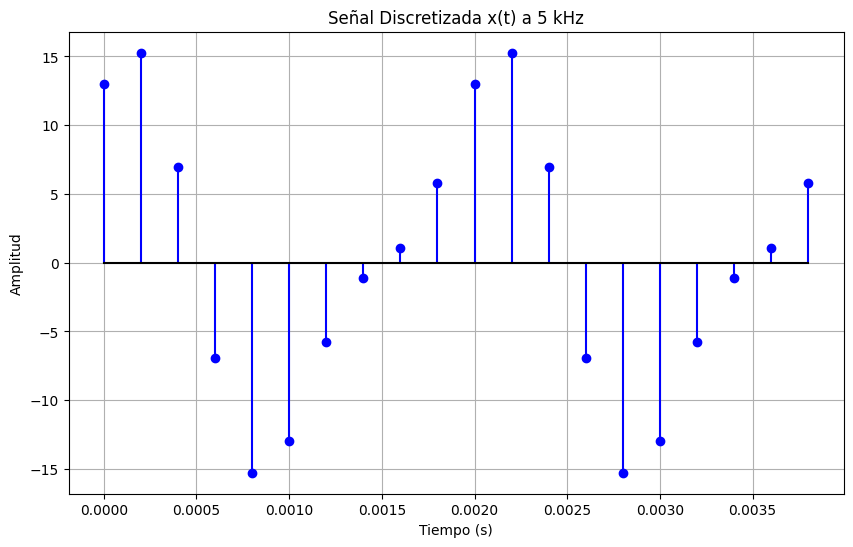

In [293]:
#Se grafica la señal muestreada a 5KHz
muestrear_y_graficar(5000, titulo='Señal Discretizada x(t) a 5 kHz')

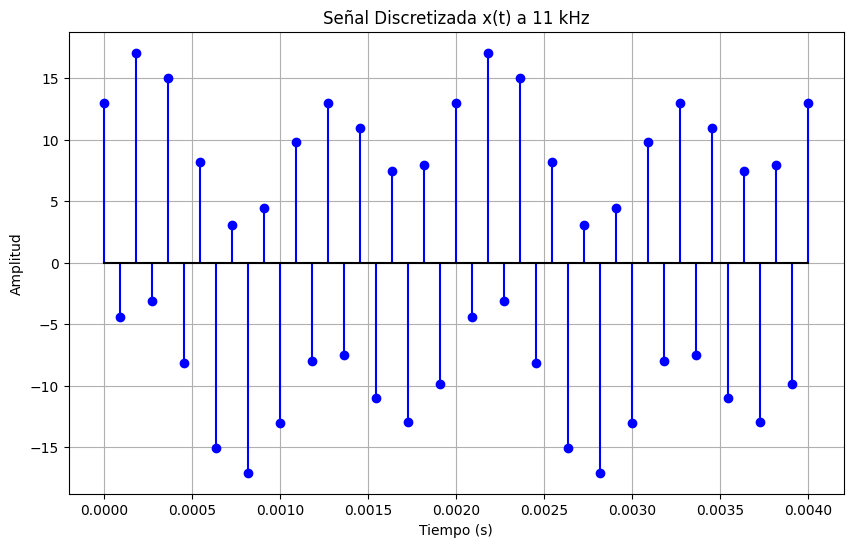

In [294]:
#La frecuencia de muestreo de 5KHz no es la adecuada para la señal dada, porque esta es menor que el doble de la frecuencia más alta de la señal (5500Hz) es necesario asegurar el teorema de Nyquist
#Dado lo anterior entonces asignamos un nuevo valor para Fs, en este caso utilizamos 11 kHz

muestrear_y_graficar(11000, titulo='Señal Discretizada x(t) a 11 kHz')

**Punto 3**

In [295]:
import sympy as sp

# Declarar los símbolos
T, t, A = sp.symbols('T t A', real=True)

# Definir la frecuencia angular
W0 = (2 * sp.pi) / T

# Definir la función para calcular la potencia media
def potencia_media(x, li, ls):
    P = sp.integrate((x)**2/T, (t, li, ls))
    return P

# señales

x1 = A*sp.cos(W0 * t)

x2_1 = 1
x2_2 = -1
x2_3 = 1


I1 = potencia_media(x1-x2_1, 0, T/4)
I2 = potencia_media(x1-x2_2, T/4, 3*T/4)
I3 = potencia_media(x1-x2_3, 3*T/4, T)

dx1_x2 = (I1 + I2 + I3)
dx1_x2 = sp.simplify(dx1_x2)
dx1_x2

A**2/2 - 4*A/pi + 1

**Punto 4**

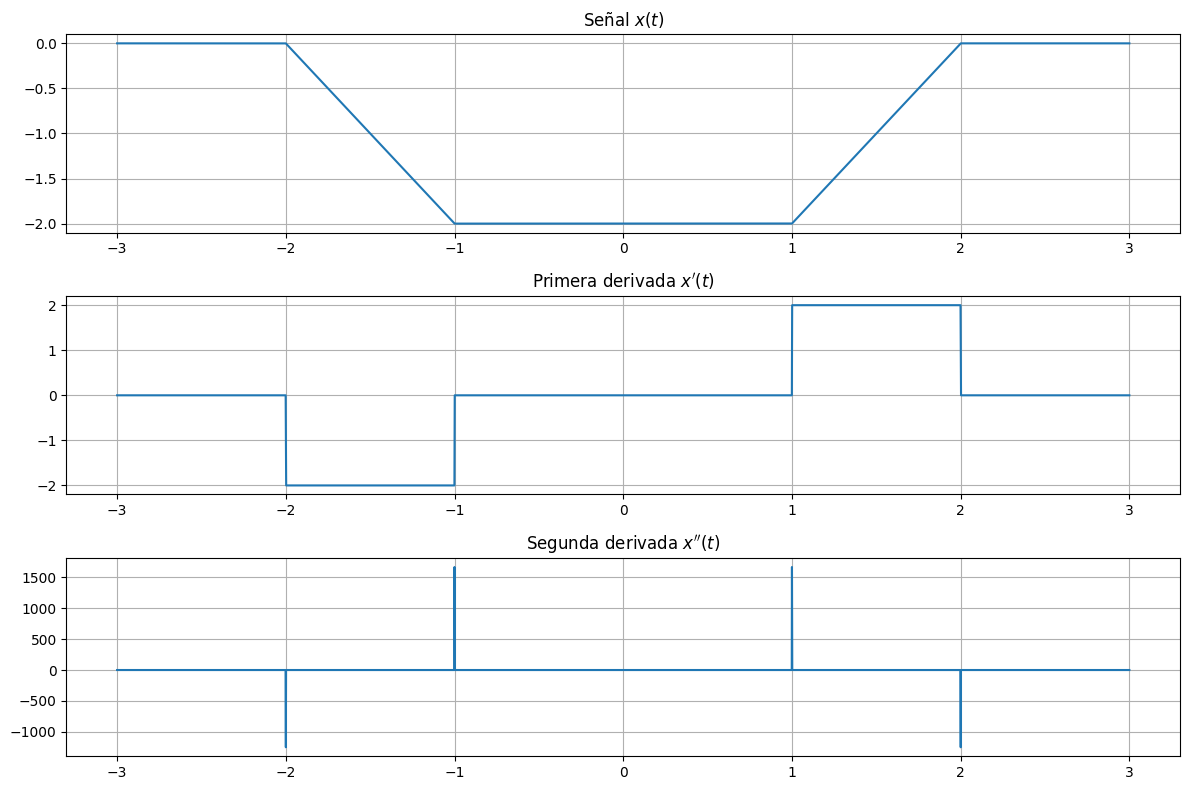

In [296]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros de la señal
A = 2
T = 6
d1 = 1
d2 = 2
w0 = 2 * np.pi / T

# Señal x(t) por tramos
def x(t, A, d1, d2, T):
    t_mod = ((t + T/2) % T) - T/2  # Asegura periodicidad centrada en cero
    y = np.zeros_like(t_mod)

    # Tramo plano izquierdo
    y[np.logical_and(t_mod >= -T/2, t_mod < -d2)] = 0
    # Tramo de bajada
    y[np.logical_and(t_mod >= -d2, t_mod < -d1)] = (-A / (d2 - d1)) * (t_mod[np.logical_and(t_mod >= -d2, t_mod < -d1)] + d2)
    # Tramo constante negativo
    y[np.logical_and(t_mod >= -d1, t_mod < d1)] = -A
    # Tramo de subida
    y[np.logical_and(t_mod >= d1, t_mod < d2)] = (A / (d2 - d1)) * (t_mod[np.logical_and(t_mod >= d1, t_mod < d2)] - d2)
    # Tramo plano derecho
    y[np.logical_and(t_mod >= d2, t_mod < T/2)] = 0

    return y

# Derivadas numéricas
def derivative(f, t, *args):
    dt = t[1] - t[0]
    return np.gradient(f(t, *args), dt)

def second_derivative(f, t, *args):
    dt = t[1] - t[0]
    return np.gradient(np.gradient(f(t, *args), dt), dt)

# Eje temporal
tv = np.linspace(-T/2, T/2, 10000)
Nm = len(tv)

# Evaluar señal y derivadas
xt = x(tv, A, d1, d2, T)
xt_prime = derivative(x, tv, A, d1, d2, T)
xt_double_prime = second_derivative(x, tv, A, d1, d2, T)

# Graficar
plt.figure(figsize=(12, 8))

plt.subplot(3,1,1)
plt.plot(tv, xt)
plt.title("Señal $x(t)$")
plt.grid(True)

plt.subplot(3,1,2)
plt.plot(tv, xt_prime)
plt.title("Primera derivada $x'(t)$")
plt.grid(True)

plt.subplot(3,1,3)
plt.plot(tv, xt_double_prime)
plt.title("Segunda derivada $x''(t)$")
plt.grid(True)

plt.tight_layout()
plt.show()

In [297]:
N = 5 #numero armonicos
wo = 2*np.pi/T # frecuencia fundamental
# definir bases
phin = np.zeros((Nm,2*N+1),dtype=np.complex128)#crear matriz para guardar bases
for n in range(-N,N+1,1):
    phin[:,n+N] = np.exp(1j*n*wo*tv)#base de fourier en el intervalo de interés

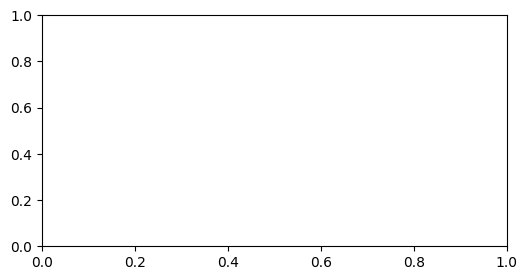

interactive(children=(IntSlider(value=1, description='n', max=5, min=-5), Output()), _dom_classes=('widget-int…

<function __main__.pltbase(n=1)>

In [298]:
# graficar bases
from ipywidgets import interact,IntSlider
fig, ax = plt.subplots(1, 1,figsize=(6,3))
def pltbase(n=1):

    plt.plot(tv,np.real(phin[:,int(n+N)]),label="Re{$\phi_n$(t)}")
    plt.xlabel("t[s]",fontsize = 14)
    plt.ylabel("$\phi_n$(t)",fontsize = 14)
    plt.plot(tv,np.imag(phin[:,int(n+N)]),label="Im{$\phi_n$(t)}")
    plt.grid()
    plt.plot(tv,xt,'r',linewidth=4,label='$x(t)$')
    ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.gcf().set_figwidth(6)
    plt.gcf().set_figheight(3)
    plt.show()
    return
interact(pltbase,n=(-N,N,1))

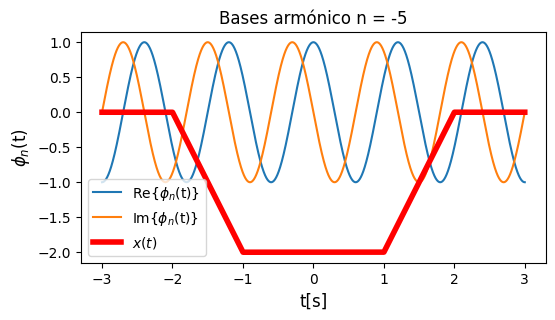

In [299]:
from matplotlib import animation, rc
from IPython.display import HTML

#figura y axes animaciónx
fig, ax = plt.subplots(1, 1,figsize=(6,3))
#función para gráfico interactivo
def update(n):
    #actualización regresor Bayesiano
    #Graficar prior
    ax.clear()
    ax.plot(tv,np.real(phin[:,int(n+N)]),label="Re{$\phi_n$(t)}")
    ax.set_xlabel("t[s]",fontsize = 12)
    ax.set_ylabel("$\phi_n$(t)",fontsize = 12)
    ax.plot(tv,np.imag(phin[:,int(n+N)]),label="Im{$\phi_n$(t)}")
    ax.plot(tv,xt,'r',linewidth=4,label='$x(t)$')
    ax.set_title(f'Bases armónico n = {n}')
    ax.legend(loc='lower left')
    plt.show()

#desplegar animación
anim = animation.FuncAnimation(fig, update, frames=np.arange(-N,N,1), blit=False)
rc('animation', html='jshtml')

In [300]:
anim

<ipython-input-301-fb6d6da96082>:14: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  integral_val = np.trapz(integrand, tv)
<ipython-input-301-fb6d6da96082>:22: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  Cn[i] = (1/T) * np.trapz(xt, tv)


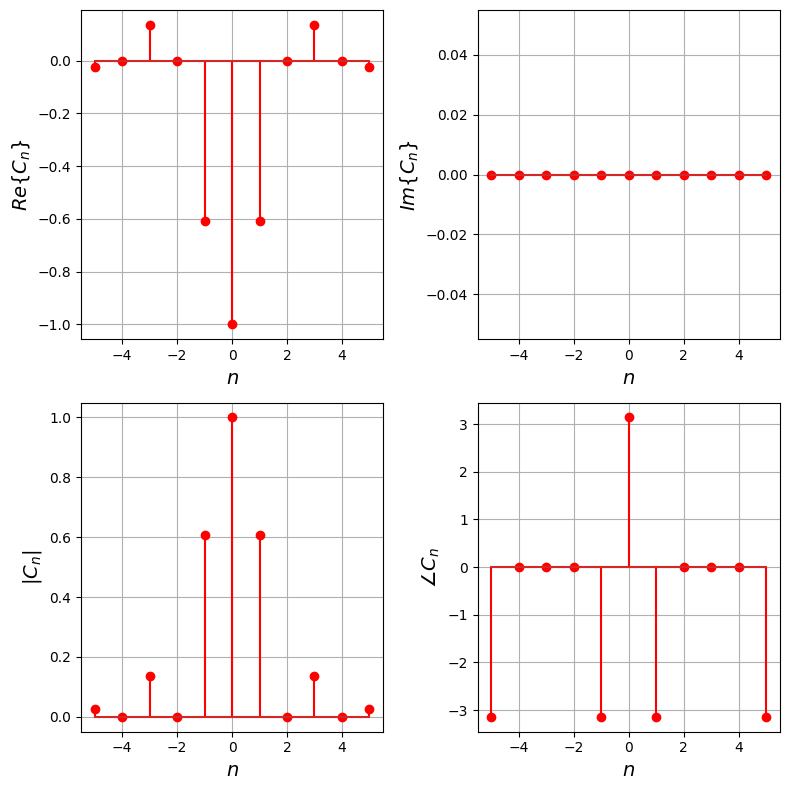

In [301]:
#calcular espectro -> cambiar según la señal estudiada
Cn = np.zeros(2*N+1,dtype=np.complex128)
nv = np.linspace(-N, N, 2*N+1) #vector num armónicos

w0 = 2 * np.pi / T

#Se itera en n para calcular el espectro Cn
for i, n in enumerate(nv):
    if n != 0:
        # Calculate the integrand for the current harmonic
        integrand = xt_double_prime * np.cos( n * w0 * tv) # Use complex exponential for complex Cn
        # Calculate the integral using trapz
        integral_val = np.trapz(integrand, tv)
        # Calculate the coefficient Cn using the formula based on the second derivative
        # Ensure the denominator is also numerical
        Cn[i] = integral_val / (T * (1j * n * w0)**2) # Formula: cn = integral(x''(t)*exp(-j n w0 t), t) / (T * (-j n w0)^2)
    else:
        # Handle the n=0 case (DC component). The integral of the second derivative over a period is 0 for a periodic signal.
        # The C0 coefficient should be calculated from the original signal x(t).
        # Let's calculate C0 by integrating the original signal x(t).
        Cn[i] = (1/T) * np.trapz(xt, tv)


#graficar espectro
fig = plt.figure(figsize=(8,8))
plt.subplot(2,2,1)
plt.stem(nv, np.real(Cn), 'r')
plt.xlabel(r'$n$',fontsize = 14)
plt.ylabel(r'$Re\{C_n\}$',fontsize = 14)
plt.axis('tight')
plt.grid()

plt.subplot(2,2,2)
plt.stem(nv, np.imag(Cn), 'r')
plt.xlabel(r'$n$',fontsize = 14)
plt.ylabel(r'$Im\{C_n\}$',fontsize = 14)
plt.axis('tight')
plt.grid()

plt.subplot(2,2,3)
plt.stem(nv, abs(Cn), 'r')#magnitud del espectro
plt.xlabel(r'$n$',fontsize = 14)
plt.ylabel(r'$|C_n|$',fontsize = 14)
plt.axis('tight')
plt.grid()

plt.subplot(2,2,4)
plt.stem(nv, np.angle(Cn), 'r')#fase del espectro
plt.xlabel(r'$n$',fontsize = 14)
plt.ylabel(r'$\angle C_n$',fontsize = 14)
plt.axis('tight')
plt.grid()

fig.tight_layout()

In [302]:
# estimar según señal estudiada
Px = 2*(((A**2*(d2-d1))/(3*T))+((A**2*d1)/T))
def pltest(Na=1):
    ind = np.arange(N-Na,N+Na+1)
    er = 1- np.sum(abs(Cn[ind])**2)/Px
    #señal reconstruida
    xe = phin[:,ind].dot(Cn[ind] ) # dot calcula el producto entre vectores
    plt.plot(tv,xe,color='b',label='$x_e(t)$') # señal estimada o filtrada
    plt.plot(tv,xt,color='r',label='x(t)') #señal original
    plt.title('$E_r$=%.2f[%%]' % (100*er),fontsize=16)
    plt.xlabel('t[s]')
    plt.ylabel('x(t)')
    plt.grid()
    plt.legend()
    plt.show()

    return
interact(pltest,Na=(1,N,1))

interactive(children=(IntSlider(value=1, description='Na', max=5, min=1), Output()), _dom_classes=('widget-int…

<function __main__.pltest(Na=1)>

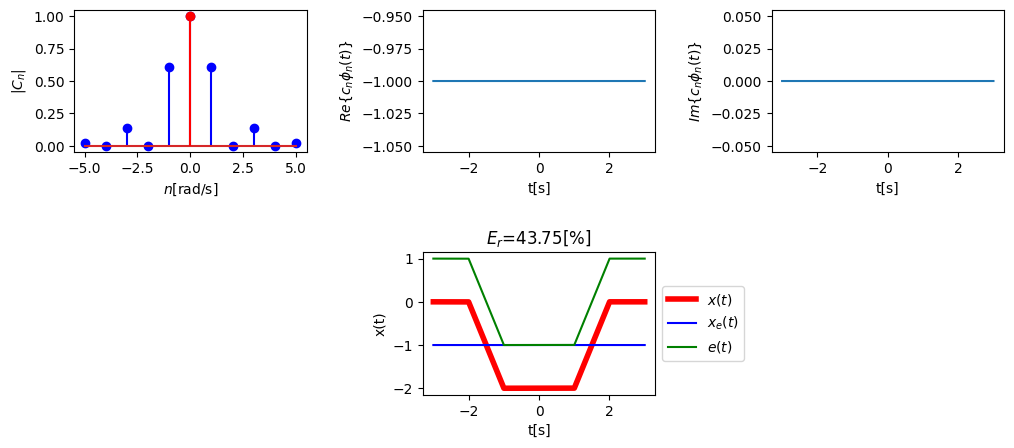

In [303]:
#figura y axes animaciónx
fig, ax = plt.subplots(2, 3,figsize=(12,5))
#función para gráfico interactivo
def update(n):
    #actualización regresor Bayesiano
    #Graficar prior
    ax[0,0].clear()
    ax[0,1].clear()
    ax[0,2].clear()
    ax[1,0].clear()
    ax[1,1].clear()
    ax[1,2].clear()

    #espectro
    ind = np.arange(N-n,N+n+1) #armónicos a considerar
    ax[0,0].stem(nv, abs(Cn), 'b')#magnitud del espectro
    ax[0,0].stem(nv[ind], abs(Cn[ind]), 'r')#magnitud del espectro
    ax[0,0].set_xlabel(r'$n$[rad/s]')
    ax[0,0].set_ylabel(r'$|C_n|$')

    #componentes espectrales
    ce = phin[:,ind].dot(np.diag(Cn[ind]) )
    ax[0,1].plot(tv,np.real(ce))#componente real
    ax[0,1].set_xlabel('t[s]')
    ax[0,1].set_ylabel('$Re\{c_n\phi_n(t)\}$')

    ax[0,2].plot(tv,np.imag(ce))#componente imaginario
    ax[0,2].set_xlabel('t[s]')
    ax[0,2].set_ylabel('$Im\{c_n\phi_n(t)\}$')




    #reconstruccion
    er = 1 - np.sum(abs(Cn[ind])**2)/Px
    #señal reconstruida
    xe = phin[:,ind].dot(Cn[ind] ) # dot calcula el producto entre vectores
    #error en t
    et = xt - xe

    ax[1,1].plot(tv,xt,'r',linewidth=4,label='$x(t)$')
    ax[1,1].plot(tv,xe,color='b',label='$x_e(t)$') # señal estimada o filtrada
    ax[1,1].plot(tv,et,color='g',label='$e(t)$') # señal estimada o filtrada
    ax[1,1].set_title('$E_r$=%.2f[%%]' % (100*er))
    ax[1,1].set_xlabel('t[s]')
    ax[1,1].set_ylabel('x(t)')
    ax[1,1].legend(loc='center left', bbox_to_anchor=(1, 0.5))
    ax[1,0].axis('off')
    ax[1,2].axis('off')
    plt.subplots_adjust(wspace=0.5,hspace=0.7)
    plt.show()

#desplegar animación
anim = animation.FuncAnimation(fig, update, frames=np.arange(0,N+1,1), blit=False)
rc('animation', html='jshtml')

In [304]:
anim

/usr/local/lib/python3.11/dist-packages/matplotlib/cbook.py:1709: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/usr/local/lib/python3.11/dist-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>